Testando função e coletando dados para o gráfico...

Tamanho:        10 | Tempo: 0.000005 segundos
Tamanho:       100 | Tempo: 0.000003 segundos
Tamanho:      1000 | Tempo: 0.000024 segundos
Tamanho:     10000 | Tempo: 0.000265 segundos
Tamanho:    100000 | Tempo: 0.003032 segundos
Tamanho:   1000000 | Tempo: 0.035947 segundos


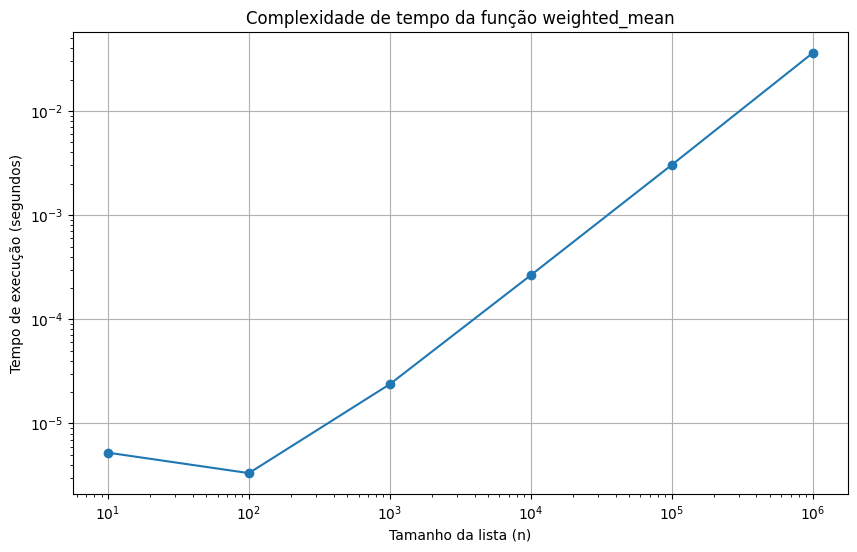

In [1]:
import time
import random
import matplotlib.pyplot as plt

def weighted_mean(list_of_numbers, weights):
    running_total = 0
    for i in range(len(list_of_numbers)):
        running_total += (list_of_numbers[i] * weights[i])
    return running_total / sum(weights)

# Função auxiliar para medir tempo
def medir_tempo(tamanho):
    numeros = [random.uniform(1, 100) for _ in range(tamanho)]
    pesos = [random.uniform(1, 10) for _ in range(tamanho)]
    
    inicio = time.time()
    resultado = weighted_mean(numeros, pesos)
    fim = time.time()
    
    return fim - inicio

# Listas para guardar os tamanhos e tempos
tamanhos = [10, 100, 1_000, 10_000, 100_000, 1_000_000]
tempos = []

print("Testando função e coletando dados para o gráfico...\n")
for tamanho in tamanhos:
    tempo_execucao = medir_tempo(tamanho)
    tempos.append(tempo_execucao)
    print(f"Tamanho: {tamanho:>9} | Tempo: {tempo_execucao:.6f} segundos")

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos, marker='o')
plt.title("Complexidade de tempo da função weighted_mean")
plt.xlabel("Tamanho da lista (n)")
plt.ylabel("Tempo de execução (segundos)")
plt.grid(True)
plt.xscale('log')  # Escala logarítmica para melhor visualização
plt.yscale('log')
plt.show()

**O código acima mede e compara o tempo de execução de duas funções de busca em listas: busca linear e busca binária. Ele faz isso para listas de diferentes tamanhos, variando de 10 até 1.000.000 de elementos.**

**- **Busca linear** percorre a lista elemento por elemento até encontrar o alvo, resultando em uma complexidade de tempo O(n).**
**- **Busca binária** só funciona em listas ordenadas e divide a busca pela metade a cada passo, resultando em uma complexidade O(log n).**

**O código gera listas ordenadas de tamanhos variados, mede o tempo que cada tipo de busca leva para encontrar um elemento (no pior caso), e armazena esses tempos em listas separadas.**

**O gráfico gerado mostra, em escala logarítmica, como o tempo de execução das duas buscas cresce conforme o tamanho da lista aumenta. A linha da busca linear cresce rapidamente, enquanto a da busca binária cresce muito pouco, ilustrando a diferença de eficiência entre os dois algoritmos.**

In [2]:
import time
import random
import matplotlib.pyplot as plt
import bisect

# Busca linear: percorre a lista elemento por elemento
def busca_linear(lista, alvo):
    for i in range(len(lista)):
        if lista[i] == alvo:
            return i
    return -1



In [3]:
# Busca binária: assume que a lista está ordenada
def busca_binaria(lista, alvo):
    pos = bisect.bisect_left(lista, alvo)
    if pos != len(lista) and lista[pos] == alvo:
        return pos
    return -1

Comparando busca linear vs binária...

Tamanho:        10 | Linear: 0.000002s | Binária: 0.000002s
Tamanho:       100 | Linear: 0.000004s | Binária: 0.000001s
Tamanho:      1000 | Linear: 0.000033s | Binária: 0.000001s
Tamanho:     10000 | Linear: 0.000308s | Binária: 0.000005s
Tamanho:    100000 | Linear: 0.005909s | Binária: 0.000006s
Tamanho:   1000000 | Linear: 0.174475s | Binária: 0.000006s


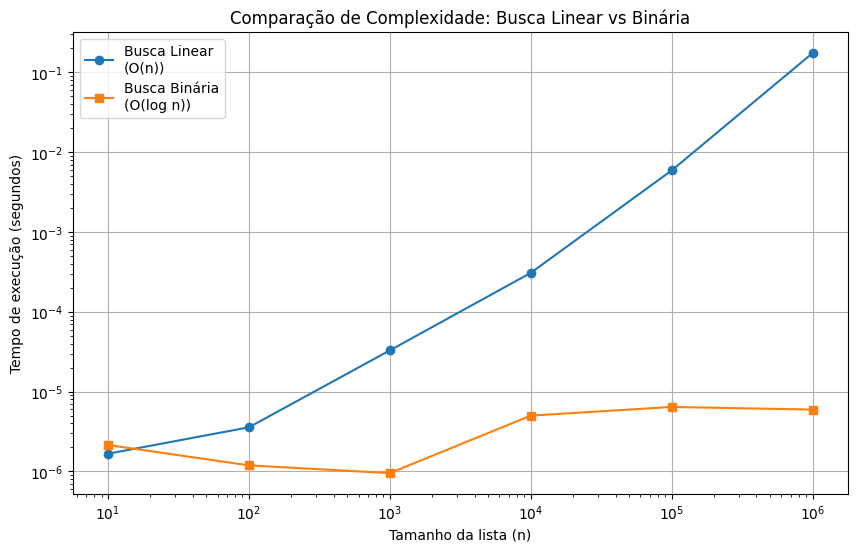

In [5]:
# Função para medir tempo das buscas
def medir_tempo_buscas(tamanho):
    lista = sorted(random.sample(range(tamanho * 10), tamanho))  # Lista ordenada sem repetições
    alvo = lista[-1]  # Pior caso para busca linear (último elemento)
    
    # Medir tempo busca linear
    inicio = time.time()
    busca_linear(lista, alvo)
    fim = time.time()
    tempo_linear = fim - inicio
    
    # Medir tempo busca binária
    inicio = time.time()
    busca_binaria(lista, alvo)
    fim = time.time()
    tempo_binaria = fim - inicio
    
    return tempo_linear, tempo_binaria

# Tamanhos das listas para o teste
tamanhos = [10, 100, 1_000, 10_000, 100_000, 1_000_000]
tempos_linear = []
tempos_binaria = []

print("Comparando busca linear vs binária...\n")
for tamanho in tamanhos:
    tempo_lin, tempo_bin = medir_tempo_buscas(tamanho)
    tempos_linear.append(tempo_lin)
    tempos_binaria.append(tempo_bin)
    print(f"Tamanho: {tamanho:>9} | Linear: {tempo_lin:.6f}s | Binária: {tempo_bin:.6f}s")


# Plotando o gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos_linear, marker='o', label='Busca Linear\n(O(n))')
plt.plot(tamanhos, tempos_binaria, marker='s', label='Busca Binária\n(O(log n))')
plt.title("Comparação de Complexidade: Busca Linear vs Binária")
plt.xlabel("Tamanho da lista (n)")
plt.ylabel("Tempo de execução (segundos)")
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.yscale('log')  # Mostra claramente a diferença entre O(n) e O(log n)
plt.show()

**"O gráfico acima compara o tempo de execução das buscas linear e binária em listas de diferentes tamanhos.\n"**
**"A busca linear (O(n)) percorre a lista elemento por elemento até encontrar o alvo, então seu tempo cresce rapidamente conforme a lista aumenta.\n"**
**"Já a busca binária (O(log n)), que exige a lista ordenada, divide a busca pela metade a cada passo, crescendo muito mais devagar.\n"**
**"No gráfico, isso é visível: a linha da busca linear sobe acentuadamente, enquanto a da busca binária permanece quase reta, mesmo para listas grandes.\n"**
**"Isso demonstra a eficiência da busca binária em comparação à busca linear para listas ordenadas."**